### <label style="color:green"> PRACTICA FINAL MINERIA DE DATOS Y APRENDIZAJE MAQUINA </label>

##### Alumnos:
- <label style="color:green"> Alejandro Madrid </label>
- <label style="color:green"> Alejandro Garcia </label>

In [215]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
#
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Imports para las redes
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Reshape
from keras.optimizers import Adam
from keras.utils import to_categorical

In [216]:
# Cargamos los datos
lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=0.4)
X, y, images = lfw_people.images, lfw_people.target, lfw_people.images
X.shape, y.shape

((1456, 50, 37), (1456,))

In [217]:
# Normalizamos las im'agenes al rango [0,1]
X = X / 255.0

# Codificamos las etiquetas
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1019, 50, 37), (437, 50, 37), (1019,), (437,))

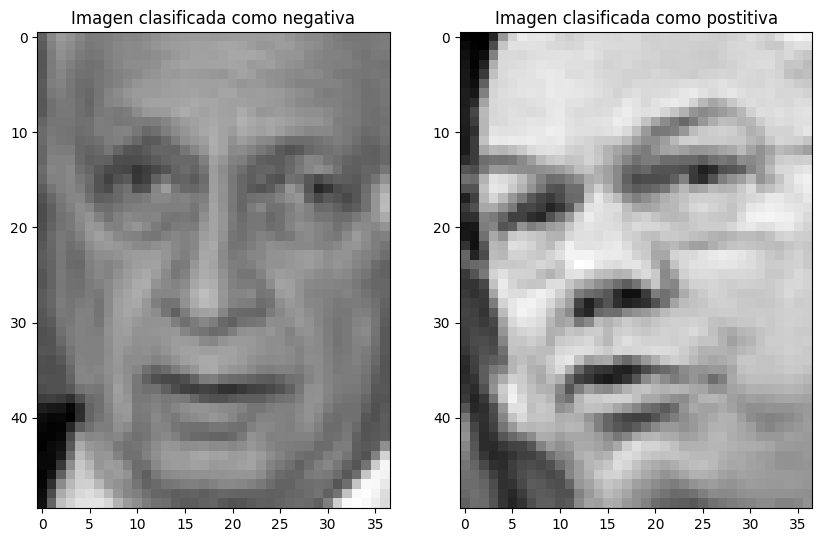

In [190]:
# Vamos a mostrar una imagen de las que usamos como clase positiva y otra de las negativas
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(images[y==0][0], cmap='gray')
plt.title("Imagen clasificada como negativa")
plt.subplot(1,2,2)
plt.imshow(images[y==1][0], cmap='gray')
plt.title("Imagen clasificada como postitiva")
plt.show()

In [218]:
# Definimos los m'etodos de reducci'on de la dimensionalidad que vamos a aplicar
# Ahora vamos a aplicar los m'etodos de reducci'on de la dimensionalidad
methods = {
    'PCA' :     PCA(n_components=2),
    'MDS' :     MDS(n_components=2),
    'ISOMAP':   Isomap(n_components=2),
    'LLE':      LocallyLinearEmbedding(n_components=2)
}

In [219]:
X_train_reduced = {} # Guardamos en el diccionario los datos de entrenamiento de menor dimensionalidad
X_test_reduced = {} # Guardamos en el diccionario los datos de testeo de menor dimensionalidad
tiempo_ejecucion = {} # Guardamos en el diccionario el tiempo de ejecucion de cada metodo
#
for name, method in methods.items():
    start_time = time.time()
    X_train_reduced[name] = method.fit_transform(X_train.reshape(X_train.shape[0], -1))
    if name != 'MDS':
        X_test_reduced[name] = method.transform(X_test.reshape(X_test.shape[0], -1))  # Usar transform en lugar de fit_transform
    else:
        X_test_reduced[name] = method.fit_transform(X_test.reshape(X_test.shape[0], -1))  # Aplicamos el mismo cambio al test
    end_time = time.time()
    tiempo_ejecucion[name] = end_time - start_time

In [193]:
X_train_reduced['MDS'].shape, X_train.shape

((1019, 2), (1019, 50, 37))

In [194]:
def plot_preprocessing(X_data, Y_data, labels, method_name): # Funci'on para representar los datos preprocesados 
    plt.figure(figsize=(10,6))
    plt.scatter(X_data, Y_data, c=labels, cmap='viridis', label=method_name)
    plt.scatter([], [], label=f'Time: {tiempo_ejecucion[method_name]:.2f}seconds')
    plt.title(f'Reduction with {method_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend(loc='upper left') 
    plt.show()

def print_data_preprocessing(X_data, Y_data, method_name):
    print(X_data, '\n', Y_data, f'\nfor method -->{method_name}')
    print(f'X shape --> {X_data.shape}')
    print(f'Y shape --> {Y_data.shape}')

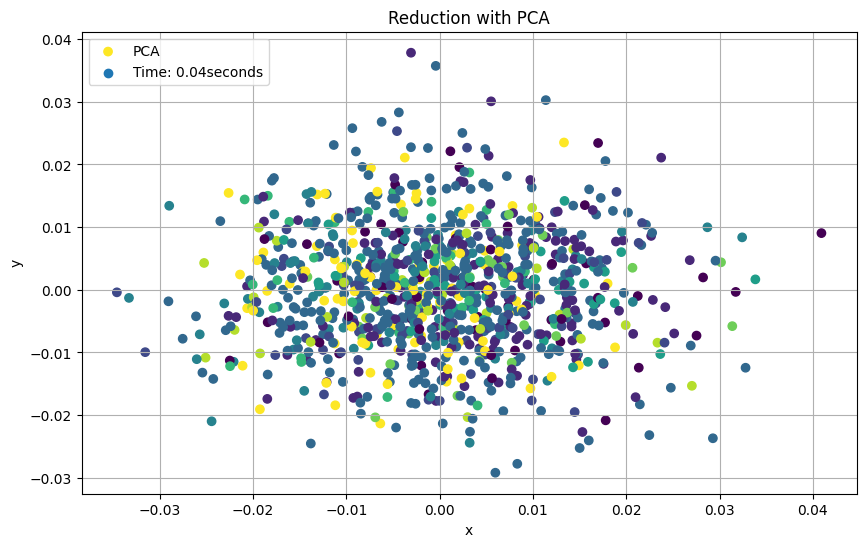

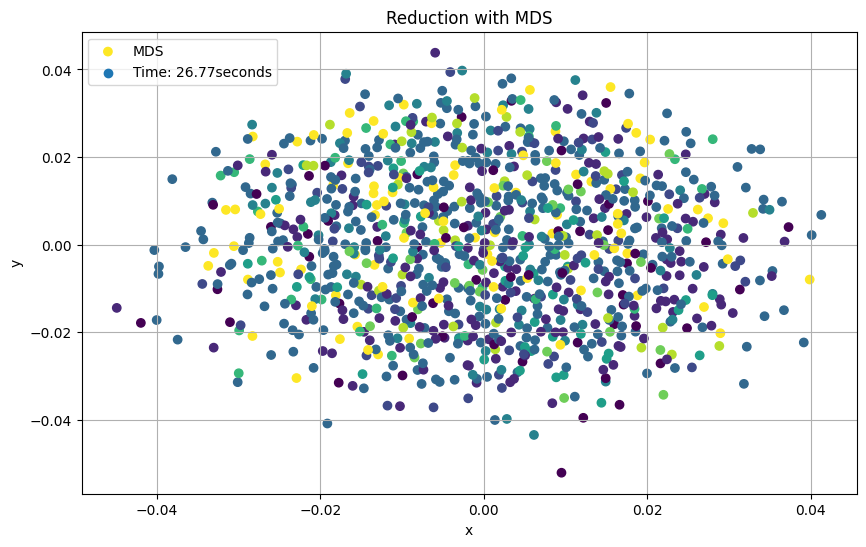

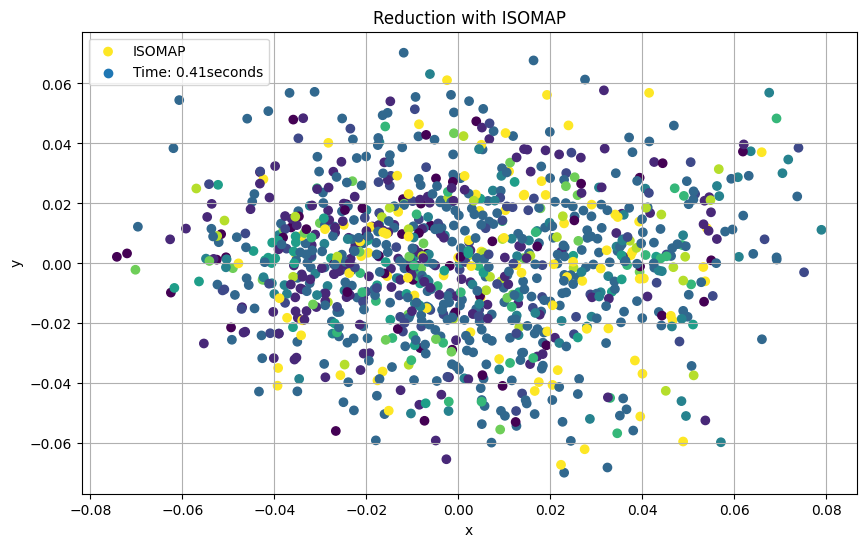

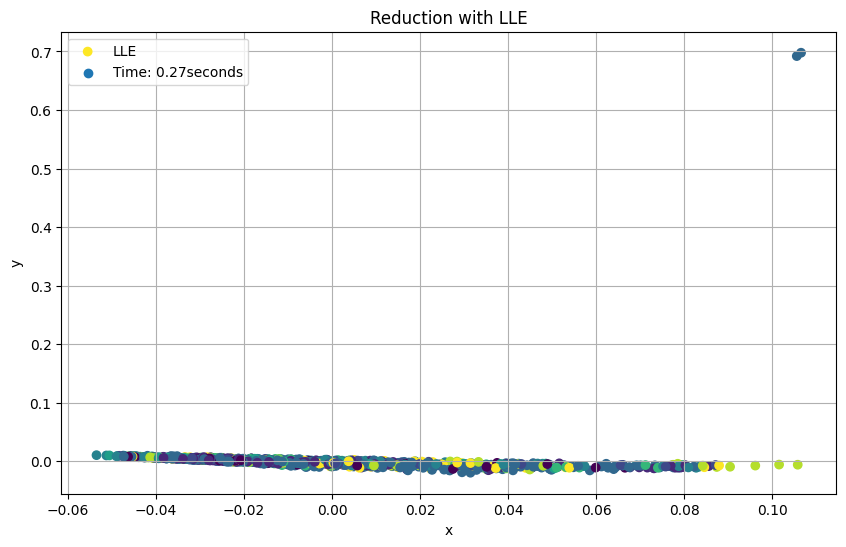

In [195]:
# Ahora graficamos los m'etodos de reducci'on 
for name, X_train_data in X_train_reduced.items():
    plot_preprocessing(X_train_data[:,0], X_train_data[:,1], y_train, name)
    # Vamos a mostrar el .shape de los originales y los reducidos de dimensionalidad junto al tiempo que ha tardado en ejecutarse

### Which one to use?
TODO: Explain which one to use

### Aplicación de modelos

In [196]:
# We can override te methods variable cause we already made every preprocessing with each method
methods = ['PCA', 'MDS', 'ISOMAP', 'LLE']

#### CNN propio

In [197]:
# Convertimos a OneHot Encoding las etiquetas
num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)
y_train_categorical[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [198]:
X_train.shape

(1019, 50, 37)

In [212]:
# Definimos nuestro modelo propio
modelo_propio = Sequential([
    Conv2D(32, (3, 3,), activation='relu', input_shape=(2, 1, 1), padding='same', strides=(1, 1)),
    MaxPooling2D( ( 2, 2 ) ),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(labelEncoder.classes_), activation='softmax')
    ])

modelo_propio.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )
modelo_propio.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 2, 1, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 1, 0, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,034 (4.04 KB)

 Trainable params: 1,034 (4.04 KB)

 Non-trainable params: 0 (0.00 B)

#### PCA

In [213]:
X_train_PCA = X_train_reduced['PCA']
X_test_PCA = X_test_reduced['PCA']
X_train_PCA.shape, X_test_PCA.shape

((1019, 2), (437, 2))

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 2), dtype=float32). Expected shape (None, 2, 1, 1), but input has incompatible shape (None, 2)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
  • training=True
  • mask=None